# Slicing ndarrays

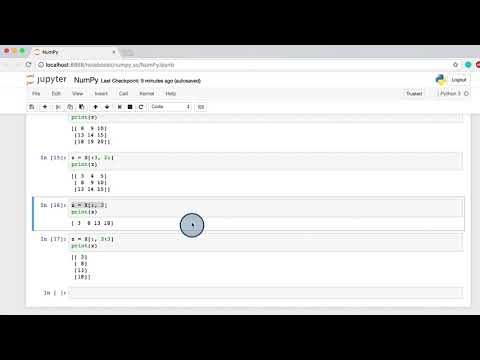

In [4]:
from IPython.display import YouTubeVideo
YouTubeVideo("jeU7lLgyMms",width="100%")

As we mentioned earlier, in addition to being able to access individual elements one at a time, NumPy provides a way to access subsets of ndarrays. This is known as slicing. Slicing is performed by combining indices with the colon : symbol inside the square brackets. In general you will come across three types of slicing:

```
1. ndarray[start:end]
2. ndarray[start:]
3. ndarray[:end]
```
The first method is used to select elements between the start and end indices. The second method is used to select all elements from the start index till the last index. The third method is used to select all elements from the first index till the end index. We should note that in methods one and three, the end index is excluded. We should also note that since ndarrays can be multidimensional, when doing slicing you usually have to specify a slice for each dimension of the array.

We will now see some examples of how to use the above methods to select different subsets of a rank 2 ndarray.

In [9]:
import numpy as np

# We create a 4 x 5 ndarray that contains integers from 0 to 19
X = np.arange(20).reshape(4, 5)

# We print X
print()
print('X = \n', X)
print()

# We select all the elements that are in the 2nd through 4th rows and in the 3rd to 5th columns
Z = X[1:4,2:5]

# We print Z
print('Z = \n', Z)

# We can select the same elements as above using method 2
W = X[1:,2:5]

# We print W
print()
print('W = \n', W)

# We select all the elements that are in the 1st through 3rd rows and in the 3rd to 4th columns
Y = X[:3,2:5]

# We print Y
print()
print('Y = \n', Y)

# We select all the elements in the 3rd row
v = X[2,:]

# We print v
print()
print('v = ', v)

# We select all the elements in the 3rd column
q = X[:,2]

# We print q
print()
print('q = ', q)

# We select all the elements in the 3rd column but return a rank 2 ndarray
R = X[:,2:3]

# We print R
print()
print('R = \n', R)


X = 
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]

Z = 
 [[ 7  8  9]
 [12 13 14]
 [17 18 19]]

W = 
 [[ 7  8  9]
 [12 13 14]
 [17 18 19]]

Y = 
 [[ 2  3  4]
 [ 7  8  9]
 [12 13 14]]

v =  [10 11 12 13 14]

q =  [ 2  7 12 17]

R = 
 [[ 2]
 [ 7]
 [12]
 [17]]


Notice that when we selected all the elements in the 3rd column, variable q above, the slice returned a rank 1 ndarray instead of a rank 2 ndarray. However, slicing X in a slightly different way, variable R above, we can actually get a rank 2 ndarray instead.

It is important to note that when we perform slices on ndarrays and save them into new variables, as we did above, the data is not copied into the new variable. This is one feature that often causes confusion for beginners. Therefore, we will look at this in a bit more detail.

In the above examples, when we make assignments, such as:

`Z = X[1:4,2:5]`

the slice of the original array X is not copied in the variable Z. Rather, X and Z are now just two different names for the same ndarray. We say that slicing only creates a view of the original array. This means that if you make changes in Z you will be in effect changing the elements in X as well. Let's see this with an example:

In [11]:
# We create a 4 x 5 ndarray that contains integers from 0 to 19
X = np.arange(20).reshape(4, 5)

# We print X
print()
print('X = \n', X)
print()

# We select all the elements that are in the 2nd through 4th rows and in the 3rd to 4th columns
Z = X[1:4,2:5]

# We print Z
print()
print('Z = \n', Z)
print()

# We change the last element in Z to 555
Z[2,2] = 555

# We print X
print()
print('X = \n', X)
print()


X = 
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]


Z = 
 [[ 7  8  9]
 [12 13 14]
 [17 18 19]]


X = 
 [[  0   1   2   3   4]
 [  5   6   7   8   9]
 [ 10  11  12  13  14]
 [ 15  16  17  18 555]]



We can clearly see in the above example that if we make changes to Z, X changes as well.

However, if we want to create a new ndarray that contains a copy of the values in the slice we need to use the np.copy() function. The np.copy(ndarray) function creates a copy of the given ndarray. This function can also be used as a method, in the same way as we did before with the reshape function. Let's do the same example we did before but now with copies of the arrays. We'll use copy both as a function and as a method.



In [12]:
# We create a 4 x 5 ndarray that contains integers from 0 to 19
X = np.arange(20).reshape(4, 5)

# We print X
print()
print('X = \n', X)
print()

# create a copy of the slice using the np.copy() function
Z = np.copy(X[1:4,2:5])

#  create a copy of the slice using the copy as a method
W = X[1:4,2:5].copy()

# We change the last element in Z to 555
Z[2,2] = 555

# We change the last element in W to 444
W[2,2] = 444

# We print X
print()
print('X = \n', X)

# We print Z
print()
print('Z = \n', Z)

# We print W
print()
print('W = \n', W)


X = 
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]


X = 
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]

Z = 
 [[  7   8   9]
 [ 12  13  14]
 [ 17  18 555]]

W = 
 [[  7   8   9]
 [ 12  13  14]
 [ 17  18 444]]


We can clearly see that by using the copy command, we are creating new ndarrays that are completely independent of each other.

It is often useful to use one ndarray to make slices, select, or change elements in another ndarray. Let's see some examples:

In [13]:
# We create a 4 x 5 ndarray that contains integers from 0 to 19
X = np.arange(20).reshape(4, 5)

# We create a rank 1 ndarray that will serve as indices to select elements from X
indices = np.array([1,3])

# We print X
print()
print('X = \n', X)
print()

# We print indices
print('indices = ', indices)
print()

# We use the indices ndarray to select the 2nd and 4th row of X
Y = X[indices,:]

# We use the indices ndarray to select the 2nd and 4th column of X
Z = X[:, indices]

# We print Y
print()
print('Y = \n', Y)

# We print Z
print()
print('Z = \n', Z)


X = 
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]

indices =  [1 3]


Y = 
 [[ 5  6  7  8  9]
 [15 16 17 18 19]]

Z = 
 [[ 1  3]
 [ 6  8]
 [11 13]
 [16 18]]


NumPy also offers built-in functions to select specific elements within ndarrays. For example, the np.diag(ndarray, k=N) function extracts the elements along the diagonal defined by N. As default is k=0, which refers to the main diagonal. Values of k > 0 are used to select elements in diagonals above the main diagonal, and values of k < 0 are used to select elements in diagonals below the main diagonal. Let's see an example:

In [14]:
# We create a 4 x 5 ndarray that contains integers from 0 to 19
X = np.arange(25).reshape(5, 5)

# We print X
print()
print('X = \n', X)
print()

# We print the elements in the main diagonal of X
print('z =', np.diag(X))
print()

# We print the elements above the main diagonal of X
print('y =', np.diag(X, k=1))
print()

# We print the elements below the main diagonal of X
print('w = ', np.diag(X, k=-1))


X = 
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]

z = [ 0  6 12 18 24]

y = [ 1  7 13 19]

w =  [ 5 11 17 23]


It is often useful to extract only the unique elements in an ndarray. We can find the unique elements in an ndarray by using the np.unique() function. The np.unique(ndarray) function returns the unique elements in the given ndarray, as in the example below:



In [16]:
# Create 3 x 3 ndarray with repeated values
X = np.array([[1,2,3],[5,2,8],[1,2,3]])

# We print X
print()
print('X = \n', X)
print()

# We print the unique elements of X 
print('The unique elements in X are:',np.unique(X))


X = 
 [[1 2 3]
 [5 2 8]
 [1 2 3]]

The unique elements in X are: [1 2 3 5 8]
